**Importing the dependencies**

In [1]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

**Data Curation**

Upload the kaggle.json file

In [2]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


**Number of Classes = 38**

In [3]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


**Data Preprocessing**

In [4]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


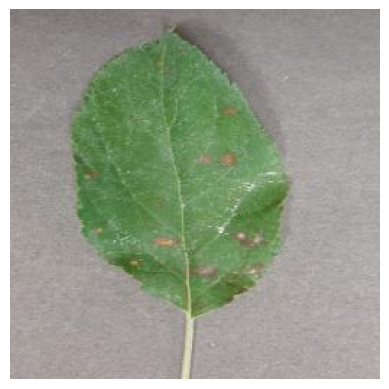

In [5]:
image_path = r"C:\Users\Anish\Desktop\plant_disease\plantvillage dataset\color\Apple___Cedar_apple_rust\0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG"

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [6]:
image_path = r"C:\Users\Anish\Desktop\plant_disease\plantvillage dataset\color\Apple___Cedar_apple_rust\0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807.JPG"
# Read the image
img = mpimg.imread(image_path)

print(img)

[[[129 124 121]
  [131 126 123]
  [131 126 123]
  ...
  [140 136 133]
  [134 130 127]
  [130 126 123]]

 [[131 126 123]
  [133 128 125]
  [132 127 124]
  ...
  [142 138 135]
  [141 137 134]
  [140 136 133]]

 [[122 117 114]
  [124 119 116]
  [127 122 119]
  ...
  [142 138 135]
  [145 141 138]
  [146 142 139]]

 ...

 [[161 151 150]
  [163 153 152]
  [165 155 154]
  ...
  [175 169 169]
  [179 173 173]
  [182 176 176]]

 [[160 150 149]
  [163 153 152]
  [167 157 156]
  ...
  [174 168 168]
  [175 169 169]
  [177 171 171]]

 [[172 162 161]
  [172 162 161]
  [172 162 161]
  ...
  [172 166 166]
  [170 164 164]
  [169 163 163]]]


In [7]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [8]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [9]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [10]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [11]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

c:\Users\Anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [14]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


c:\Users\Anish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 861s 633ms/step - accuracy: 0.5724 - loss: 2.1032 - val_accuracy: 0.8398 - val_loss: 0.5183
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.4461
Epoch 3/5


c:\Users\Anish\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 846s 623ms/step - accuracy: 0.9174 - loss: 0.2684 - val_accuracy: 0.8662 - val_loss: 0.4589
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0701
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 846s 623ms/step - accuracy: 0.9637 - loss: 0.1154 - val_accuracy: 0.8757 - val_loss: 0.5005


**Model Evaluation**

In [15]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 40s 119ms/step - accuracy: 0.8710 - loss: 0.5031
Validation Accuracy: 87.57%


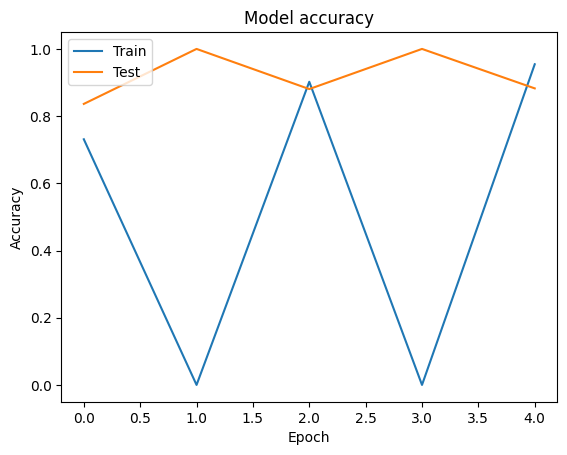

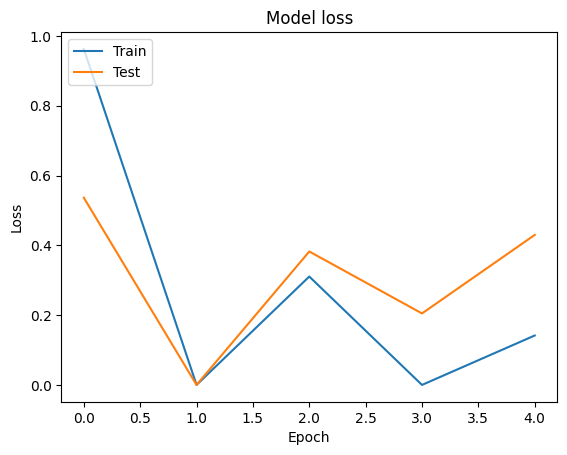

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [49]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

#Function to Predict the Class of an Image
# def predict_image_class(model, image_path, class_indices):
#     preprocessed_img = load_and_preprocess_image(image_path)
#     predictions = model.predict(preprocessed_img)
#     predicted_class_index = np.argmax(predictions, axis=1)[0]
#     predicted_class_name = class_indices[predicted_class_index]
#     return predicted_class_name

def predict_image_class(model, image_path, class_indices):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions[0])

    # Check if predicted_class_index is in class_indices
    if predicted_class_index in class_indices:
        predicted_class_name = class_indices[predicted_class_index]
    else:
        predicted_class_name = "Unknown class"

    return predicted_class_name


In [50]:
# # Create a mapping from class indices to class names
class_indices = {k: v for k, v in train_generator.class_indices.items()}
with open('class_indices.txt', 'w') as f:
    for index, class_name in class_indices.items():
        f.write(f"{index}: {class_name}\n")
# print(train_generator.class_indices.items())
# print("Class indices saved to 'class_indices.txt'.")

In [51]:
class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [52]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

final testing of modal

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Class Name: Blueberry___healthy


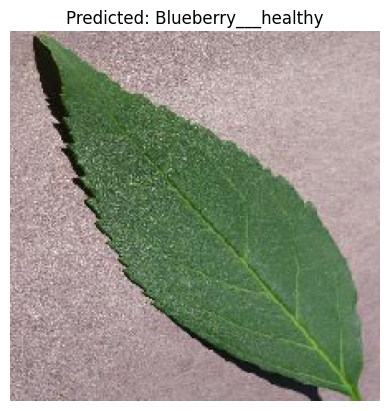

In [63]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import json

# Load class indices
class_indices = {
    0: "Apple___Apple_scab",
    1: "Apple___Black_rot",
    2: "Apple___Cedar_apple_rust",
    3: "Apple___healthy",
    4: "Blueberry___healthy",
    5: "Cherry_(including_sour)___Powdery_mildew",
    6: "Cherry_(including_sour)___healthy",
    7: "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    8: "Corn_(maize)___Common_rust_",
    9: "Corn_(maize)___Northern_Leaf_Blight",
    10: "Corn_(maize)___healthy",
    11: "Grape___Black_rot",
    12: "Grape___Esca_(Black_Measles)",
    13: "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    14: "Grape___healthy",
    15: "Orange___Haunglongbing_(Citrus_greening)",
    16: "Peach___Bacterial_spot",
    17: "Peach___healthy",
    18: "Pepper,_bell___Bacterial_spot",
    19: "Pepper,_bell___healthy",
    20: "Potato___Early_blight",
    21: "Potato___Late_blight",
    22: "Potato___healthy",
    23: "Raspberry___healthy",
    24: "Soybean___healthy",
    25: "Squash___Powdery_mildew",
    26: "Strawberry___Leaf_scorch",
    27: "Strawberry___healthy",
    28: "Tomato___Bacterial_spot",
    29: "Tomato___Early_blight",
    30: "Tomato___Late_blight",
    31: "Tomato___Leaf_Mold",
    32: "Tomato___Septoria_leaf_spot",
    33: "Tomato___Spider_mites Two-spotted_spider_mite",
    34: "Tomato___Target_Spot",
    35: "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    36: "Tomato___Tomato_mosaic_virus",
    37: "Tomato___healthy"
}

# Function to predict the image class
def predict_image_class(model, image_path, class_indices):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Predict the class of the image
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions[0])

    # Map the predicted class index to the actual class name
    predicted_class_name = class_indices.get(predicted_class_index, "Unknown class")
    
    return predicted_class_name

# Load the model
model = load_model('plant_disease_prediction_model.h5')

# Example usage
image_path = r"C:\Users\Anish\Desktop\plant_disease\plantvillage dataset\color\Cherry_(including_sour)___healthy\00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.JPG"
#image_path2=r"C:\Users\Anish\Desktop\plant_disease\straw.JPG"
predicted_class_name = predict_image_class(model, image_path, class_indices)
#predicted_class_name2 = predict_image_class(model, image_path2, class_indices)

# Output the result
image = load_img(image_path, target_size=(224,224))
#image2 = load_img(image_path2, target_size=(224,224))
print("Predicted Class Name:", predicted_class_name)
#print("Predicted Class Name:", predicted_class_name2)
plt.imshow(image)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')  # Hide axis labels
plt.show()
# plt.imshow(image2)
# plt.title(f"Predicted: {predicted_class_name2}")
# plt.axis('off')  # Hide axis labels
# plt.show()




In [26]:
model.save('plant_disease_prediction_model.h5')